In [6]:
# STEP 2: DATA CLEANING  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from  itertools import groupby

df = pd.read_csv('IHME.csv')

# This will display the first 5 rows of the DataFrame
print(df.head())

print(df.describe())

IHME = pd.read_csv("IHME.csv")
IHME

# Remove rows with missing values
df = df.dropna()

# replace all NaNs with 0
df = df.fillna(value=0) 

# Remove duplicates
df = df.drop_duplicates()

# Rename columns
df = df.rename(columns={'year_id': 'year'})
df = df.rename(columns={'age_group_id': 'age'})
df = df.rename(columns={'age_group_name': 'age_group'})
df = df.rename(columns={'sex': 'sex'})
df = df.rename(columns={'function': 'function'})
df = df.rename(columns={'type_of_care': 'caretype'})
df = df.rename(columns={'acause': 'cause'})
df = df.rename(columns={'cause_name': 'cause_name'})
df = df.rename(columns={'mean_all': 'mean_all'})
df = df.rename(columns={'mean_pub': 'mean_pub'})
df = df.rename(columns={'mean_pri': 'mean_pri'})
df = df.rename(columns={'mean_oop': 'mean_oop'})

                        
df = df.reset_index(drop=True)

   year_id  age_group_id age_group_name  sex_id   sex function  \
0     1996             5         1 to 4       1  Male       AM   
1     1997             5         1 to 4       1  Male       AM   
2     1998             5         1 to 4       1  Male       AM   
3     1999             5         1 to 4       1  Male       AM   
4     2000             5         1 to 4       1  Male       AM   

      type_of_care acause                                         cause_name  \
0  Ambulatory care  _comm  Communicable, maternal, neonatal, and nutritio...   
1  Ambulatory care  _comm  Communicable, maternal, neonatal, and nutritio...   
2  Ambulatory care  _comm  Communicable, maternal, neonatal, and nutritio...   
3  Ambulatory care  _comm  Communicable, maternal, neonatal, and nutritio...   
4  Ambulatory care  _comm  Communicable, maternal, neonatal, and nutritio...   

   cause_id  ...    upper_all    mean_pub   lower_pub   upper_pub  \
0     295.0  ...  3124.714039  605.080639  437.147993

In [32]:
# STEP 3: DATA ANALYSIS

# check data types of columns and non-null count
df.info()

# export cleaned dataframe to csv file for data analysis
df.to_csv('IHME_cleaned.csv')

# DataFrame.sort_values('key')
sorted_data = df.sort_values('caretype',kind ='mergesort')
sorted_data.reset_index(drop=True)

# Group by Type of Care 
gp = df.groupby(['caretype','cause'])
gp.first()

# Filtering df 
df.filter(["caretype", "mean_all", "mean_priv", "mean_pub", "mean_oop"]).head()

# Calculating Percent of Type of Care
print(df['caretype'].value_counts(normalize=True))

# Median Cost by Type of Care 
median_amb = df[df['caretype']=='Ambulatory care']['mean_all'].median()
median_inp = df[df['caretype']=='Inpatient care']['mean_all'].median()
median_pharm = df[df['caretype']=='Prescribed pharmaceutical care']['mean_all'].median()
median_ed = df[df['caretype']=='Emergency department care']['mean_all'].median()
median_nurse = df[df['caretype']=='Nurse care facility']['mean_all'].median()
median_gov = df[df['caretype']=='Government Administration and Net Cost of Insurance Programs']['mean_all'].median()


print(f"The median cost of Ambulatory Care is {median_amb}")
print(f"The median cost of Inpatient care is {median_inp}")
print(f"The median cost of Prescribed pharmaceutical care is {median_pharm}")
print(f"The median cost of Emergency department care is {median_ed}")
print(f"The median cost of Nurse care facility is {median_nurse}")
print(f"The median cost of Government Administration and Net Cost of Insurance Programs is {median_gov}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90006 entries, 0 to 90005
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        90006 non-null  int64  
 1   age         90006 non-null  int64  
 2   age_group   90006 non-null  object 
 3   sex_id      90006 non-null  int64  
 4   sex         90006 non-null  object 
 5   function    90006 non-null  object 
 6   caretype    90006 non-null  object 
 7   cause       90006 non-null  object 
 8   cause_name  90006 non-null  object 
 9   cause_id    90006 non-null  float64
 10  mean_all    90006 non-null  float64
 11  lower_all   90006 non-null  float64
 12  upper_all   90006 non-null  float64
 13  mean_pub    90006 non-null  float64
 14  lower_pub   90006 non-null  float64
 15  upper_pub   90006 non-null  float64
 16  mean_pri    90006 non-null  float64
 17  lower_pri   90006 non-null  float64
 18  upper_pri   90006 non-null  float64
 19  mean_oop    90006 non-nul

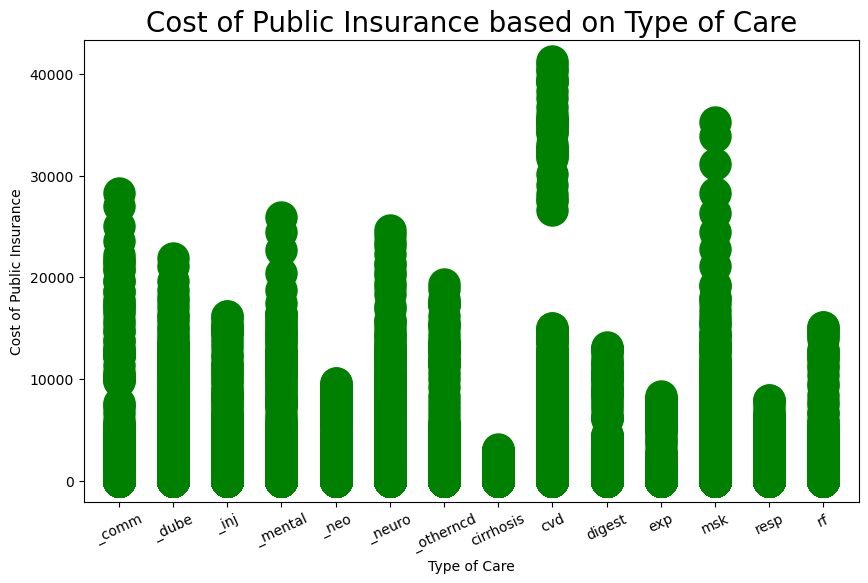

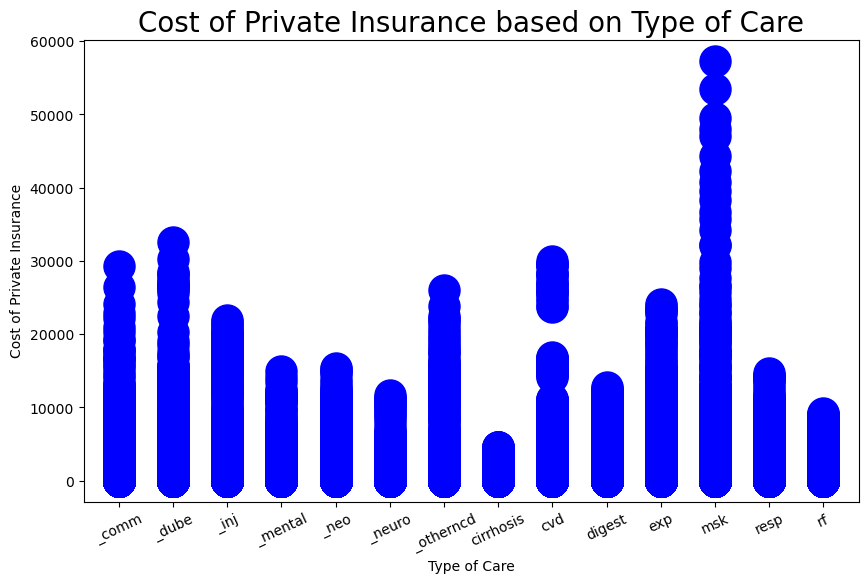

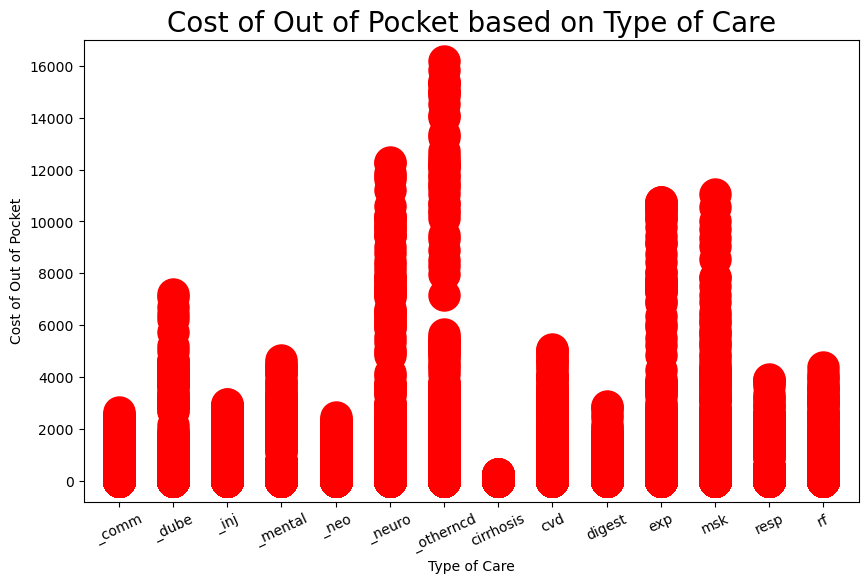

In [ ]:
# STEP 3: DATA VISUALISATION


#Scatter plot for Cost of Public Insurance by Type of Care 

caretype = [] 
mean_pub = [] 
  
with open('IHME.csv','r') as csvfile: 
    lines = csv.reader(csvfile, delimiter=',') 
    header = next(lines)
    for row in lines: 
        caretype.append(row[7]) 
        mean_pub.append(float(row[14]))

plt.figure(figsize=(10, 6))
plt.scatter(caretype, mean_pub, color = 'g',s = 500) 
plt.xticks(rotation = 25) 
plt.xlabel('Type of Care') 
plt.ylabel('Cost of Public Insurance') 
plt.title('Cost of Public Insurance based on Type of Care', fontsize = 20) 
  
plt.show() 

#Scatter plot for Cost of Private Insurance by Type of Care 

caretype = [] 
mean_priv = [] 
  
with open('IHME.csv','r') as csvfile: 
    lines = csv.reader(csvfile, delimiter=',') 
    header = next(lines)
    for row in lines: 
        caretype.append(row[7]) 
        mean_priv.append(float(row[17]))

plt.figure(figsize=(10, 6))
plt.scatter(caretype, mean_priv, color = 'b',s = 500) 
plt.xticks(rotation = 25) 
plt.xlabel('Type of Care') 
plt.ylabel('Cost of Private Insurance') 
plt.title('Cost of Private Insurance based on Type of Care', fontsize = 20) 
  
plt.show() 

#Scatter plot for Cost of Out of Pocket by Type of Care 

caretype = [] 
mean_oop = [] 
  
with open('IHME.csv','r') as csvfile: 
    lines = csv.reader(csvfile, delimiter=',') 
    header = next(lines)
    for row in lines: 
        caretype.append(row[7]) 
        mean_oop.append(float(row[20]))

plt.figure(figsize=(10, 6))
plt.scatter(caretype, mean_oop, color = 'r',s = 500) 
plt.xticks(rotation = 25) 
plt.xlabel('Type of Care') 
plt.ylabel('Cost of Out of Pocket') 
plt.title('Cost of Out of Pocket based on Type of Care', fontsize = 20) 
  
plt.show() 
